In [ ]:
import numpy as np
from tqdm import tqdm
from IPython.display import display, Javascript
import json
from collections import namedtuple
from numpy.random import uniform, seed
from numpy import floor
import matplotlib.pyplot as plt
from array import *
from matplotlib.ticker import MaxNLocator


In [ ]:
#abstract function which simulates tickets being sold

def _tickets_sold(p, demand_level, max_qty):
    quantity_demanded = floor(max(0, p - demand_level))
    return min(quantity_demanded, max_qty)

In [ ]:
#function to plot chart
def plotgraph(revenue,price,ticket,days):
  rv = np.array(revenue)
  pr = np.array(price)
  tc = np.array(ticket) 
  day_arr = []
  for i in range(days):
    day_arr.append(i)
  plt.plot(day_arr,rv , color='r', label='Revenue')
  plt.xlabel("Days")
  plt.locator_params(axis='x', nbins=days)
  plt.ylabel("Revenue")
  plt.show()
  plt.plot(day_arr,pr, color='g', label='price')
  plt.xlabel("Days")
  plt.locator_params(axis='x', nbins=days)
  plt.ylabel("Ticket Price")
  plt.show()
  plt.plot(day_arr,tc , color='r', label='tickets sold')
  plt.xlabel("Days")
  plt.locator_params(axis='x', nbins=days)
  plt.ylabel("Tickets Sold")
  plt.show()


In [ ]:
# Simulate revenues achieved by pricing function on a event (days_left before event, number of tickets to sell) with random demand
def simulate_revenue(days_left, tickets_left, pricing_function, rev_to_date=0, demand_level_min=100, demand_level_max=200, verbose=False):
    
    #flight has flown or no tickets left
    if (days_left == 0) or (tickets_left == 0):
        
        if verbose:
            if (days_left == 0):
                print("The flight took off today. ")
            if (tickets_left == 0):
                print("This flight is booked full.")
            print("Total Revenue: €{:.0f}".format(rev_to_date))
        return rev_to_date
    
    else:
        
        demand_level = uniform(demand_level_min, demand_level_max)
        p = pricing_function(days_left, tickets_left, demand_level)
        q = _tickets_sold(demand_level, p, tickets_left)
        
        
        if verbose:
            print("{:.0f} days before flight: "
                  "Started with {:.0f} seats. "
                  "Demand level: {:.0f}. "
                  "Price set to €{:.0f}. "
                  "Sold {:.0f} tickets. "
                  "Daily revenue is {:.0f}. Total revenue-to-date is {:.0f}. "
                  "{:.0f} seats remaining".format(days_left, tickets_left, demand_level, p, q, p*q, p*q+rev_to_date, tickets_left-q))
            revenue.append(p*q+rev_to_date)
            price.append(p)
            ticket.append(q)
        return simulate_revenue(days_left = days_left-1,
                              tickets_left = tickets_left-q,
                              pricing_function=pricing_function,
                              rev_to_date=rev_to_date + p * q,
                              demand_level_min=demand_level_min,
                              demand_level_max=demand_level_max,
                              verbose=verbose)

In [ ]:
# Calculate average revenues per event achieved by pricing function on a range of events => To compare algorithms

def score_me(pricing_function, sims_per_scenario=200):
    
    seed(0)
    Scenario = namedtuple('Scenario', 'n_days n_tickets')
    scenarios = [Scenario(n_days=100, n_tickets=100), Scenario(n_days=14, n_tickets=50),
                 Scenario(n_days=2, n_tickets=20), Scenario(n_days=1, n_tickets=3),
                 ]
    scenario_scores = []
    
    for s in scenarios:
        
        scenario_score = sum(simulate_revenue(s.n_days, s.n_tickets, pricing_function)
                                     for _ in range(sims_per_scenario)) / sims_per_scenario
        
        print("Ran {:.0f} flights starting {:.0f} days before flight with {:.0f} tickets. "
              "Average revenue: €{:.0f}".format(sims_per_scenario, s.n_days, s.n_tickets, scenario_score))
        
        scenario_scores.append(scenario_score)
    
    score = sum(scenario_scores) / len(scenario_scores)
    
    print("Average revenue across all flights is €{:.0f}".format(score))

##0. Inelastic Pricing
sells tickets at a constant price


In [ ]:
def constant_pricing_function(days_left, tickets_left, demand_level):
    """Sample pricing function"""
    price = 150
    return price

7 days before flight: Started with 50 seats. Demand level: 139. Price set to €150. Sold 0 tickets. Daily revenue is 0. Total revenue-to-date is 0. 50 seats remaining
6 days before flight: Started with 50 seats. Demand level: 107. Price set to €150. Sold 0 tickets. Daily revenue is 0. Total revenue-to-date is 0. 50 seats remaining
5 days before flight: Started with 50 seats. Demand level: 142. Price set to €150. Sold 0 tickets. Daily revenue is 0. Total revenue-to-date is 0. 50 seats remaining
4 days before flight: Started with 50 seats. Demand level: 157. Price set to €150. Sold 6 tickets. Daily revenue is 900. Total revenue-to-date is 900. 44 seats remaining
3 days before flight: Started with 44 seats. Demand level: 110. Price set to €150. Sold 0 tickets. Daily revenue is 0. Total revenue-to-date is 900. 44 seats remaining
2 days before flight: Started with 44 seats. Demand level: 191. Price set to €150. Sold 41 tickets. Daily revenue is 6150. Total revenue-to-date is 7050. 3 seats re

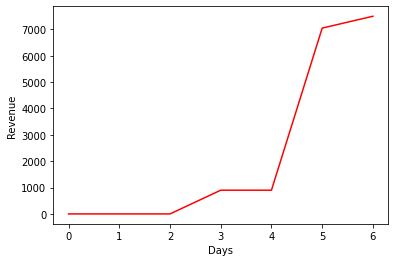

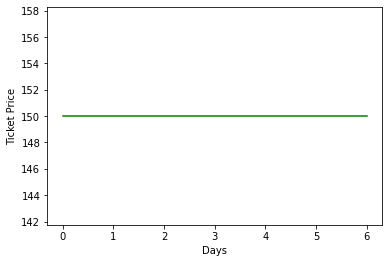

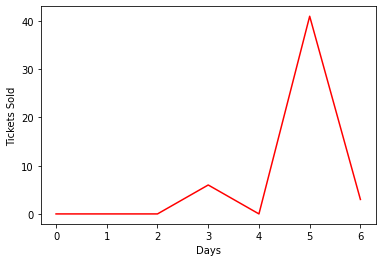

In [ ]:
revenue = []
price = []
ticket = []
simulate_revenue(days_left=7, tickets_left=50, pricing_function=constant_pricing_function, verbose=True)
print()
plotgraph(revenue,price,ticket,7)

##1. Basic Pricing Function
Sells 10 Tickets per day

In [ ]:
def basic_pricing_function(days_left, tickets_left, demand_level):
    """Sample pricing function"""
    price = demand_level - 10
    return price

7 days before flight: Started with 50 seats. Demand level: 131. Price set to €121. Sold 10 tickets. Daily revenue is 1210. Total revenue-to-date is 1210. 40 seats remaining
6 days before flight: Started with 40 seats. Demand level: 147. Price set to €137. Sold 10 tickets. Daily revenue is 1370. Total revenue-to-date is 2580. 30 seats remaining
5 days before flight: Started with 30 seats. Demand level: 187. Price set to €177. Sold 10 tickets. Daily revenue is 1775. Total revenue-to-date is 4355. 20 seats remaining
4 days before flight: Started with 20 seats. Demand level: 124. Price set to €114. Sold 10 tickets. Daily revenue is 1140. Total revenue-to-date is 5495. 10 seats remaining
3 days before flight: Started with 10 seats. Demand level: 149. Price set to €139. Sold 10 tickets. Daily revenue is 1389. Total revenue-to-date is 6884. 0 seats remaining
This flight is booked full.
Total Revenue: €6884



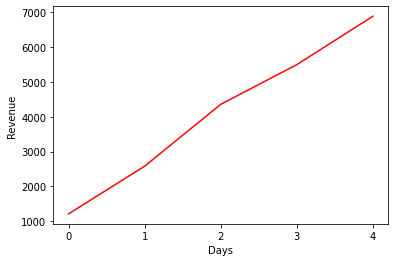

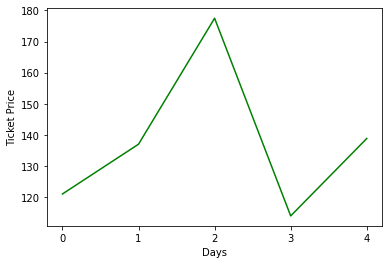

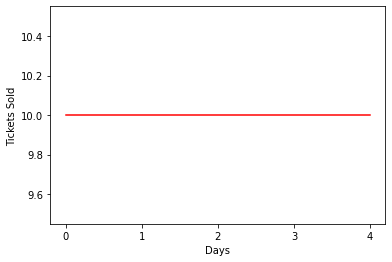

In [ ]:
revenue = []
price = []
ticket = []
simulate_revenue(days_left=7, tickets_left=50, pricing_function=basic_pricing_function, verbose=True)
print()
plotgraph(revenue,price,ticket,5)

##2.Brute Force Algorithm
Checks out every possibility to get an Optimal Price.

In [ ]:
# we assume max day left = 100, max tickets to sell = 100
n = 100
optimal_prices = np.zeros((n+1, n+1, n+1), dtype='uint8') # The optimal price given the number of days left (0->100), tickets left (0->100) and current demand level (100->200)
optimal_sales = np.zeros((n+1, n+1), dtype=float)      # Expected profit when pricing optimally given the number of days and tickets left

# Base case when there is 1 day left
for tickets_left in range(n+1):
    
    for demand in range(n, 2*n+1):
        
        tickets_sold = min(demand // 2, tickets_left) # demand / 2 is the optimal quantity to sell if there are enough tickets left
        price = demand - tickets_sold
        
        optimal_prices[1, tickets_left, demand - 100] = price
        
        # Calculate optimal revenue expectation. Sum over every demand level with equal chance of occurence (uniform distribution)
        optimal_sales[1, tickets_left] += (price * tickets_sold / 101) # Average out the best profit through all possible demand levels
        
        # Fill in the tables
for days_left in tqdm(range(2, n+1)):
    
    for tickets_left in range(n+1):
        
        last_best_price = 0 # For previous demand level (one lower)
        
        for demand in range(n, 2*n+1):
            
            # Search over all prices to find the best price for the context: days_left, tickets_left, demand_level
            best_revenue = 0
            best_price = 0
                        
            # No need to search all prices in range(0, demand):
            for price in range(max(demand - tickets_left, last_best_price), demand+1): # optimal price should not be lower than demand - remaining tickets or the last best price
                
                tickets_sold = min(demand - price, tickets_left) # This is the quantity that will be sold at price p
                revenue = price * tickets_sold + optimal_sales[days_left - 1, tickets_left - tickets_sold] # This is the total expected profit if selling at price p
                
                if revenue > best_revenue: # Update best profit and price
                    best_revenue, best_price = revenue, price
            
            # Set the optimal price and profit values
            optimal_prices[days_left, tickets_left, demand-100] = best_price
            
            # similarly let's calculate the optimal_sales expectation over all possible demand level (same probability of occurence)
            optimal_sales[days_left, tickets_left] += (best_revenue / 101) # Average out the best profit through all possible demand level
            
            last_best_price = best_price # For higher demand levels, this best_price is the floor

100%|██████████| 99/99 [00:06<00:00, 14.25it/s]


In [ ]:
def pricing_function_bf(days_left, tickets_left, demand_level):
    """Return the optimal price"""
    
    # These should be cast to an integer (and rounded down)
    tickets_left = int(tickets_left)
    demand_level = int(demand_level)
    
    return optimal_prices[days_left, tickets_left, demand_level-100] # Return the precomputed values

pricing function:
7 days before flight: Started with 50 seats. Demand level: 198. Price set to €175. Sold 23 tickets. Daily revenue is 4025. Total revenue-to-date is 4025. 27 seats remaining
6 days before flight: Started with 27 seats. Demand level: 152. Price set to €150. Sold 1 tickets. Daily revenue is 150. Total revenue-to-date is 4175. 26 seats remaining
5 days before flight: Started with 26 seats. Demand level: 149. Price set to €146. Sold 2 tickets. Daily revenue is 292. Total revenue-to-date is 4467. 24 seats remaining
4 days before flight: Started with 24 seats. Demand level: 160. Price set to €152. Sold 7 tickets. Daily revenue is 1064. Total revenue-to-date is 5531. 17 seats remaining
3 days before flight: Started with 17 seats. Demand level: 109. Price set to €109. Sold 0 tickets. Daily revenue is 0. Total revenue-to-date is 5531. 17 seats remaining
2 days before flight: Started with 17 seats. Demand level: 131. Price set to €126. Sold 4 tickets. Daily revenue is 504. Total

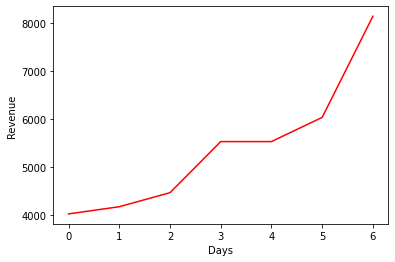

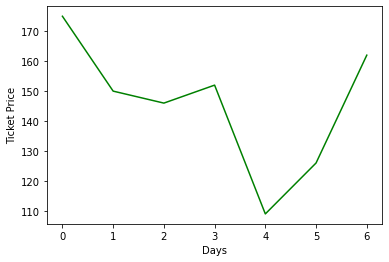

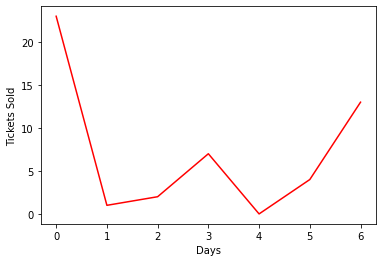

In [ ]:
print('pricing function:')
revenue = []
price = []
ticket = []
simulate_revenue(days_left=7, tickets_left=50, pricing_function=pricing_function_bf, verbose=True)
score_me(pricing_function_bf, 200)
plotgraph(revenue,price,ticket,7)

##3. Dynamic Programming
Use of Dynamic programming over Recursion


In [ ]:
from math import floor

savedF = {}
savedG = {}                                  

def getF(tickets,days):
    if tickets<=0 or days <= 0:
        return 0
    if (tickets,days) in savedF:
        return savedF[(tickets,days)]
    res = 0.0
    #count math expectation 
    for i in range(100, 201):
        res += getG(tickets, days, i)[0]
    res /= 101
    
    savedF[(tickets,days)] = res
    return res

def getG(tickets, days, demand):
    if days <= 0 or tickets <= 0:
        return (0,0)
    if (tickets, days, demand) in savedG:
        return savedG[(tickets, days, demand)]
    topTotal = -1
    topPrice = -1
    for i in range(1, demand+1):
        res = min(demand-i, tickets)*i + (getF(tickets-(demand-i), days-1) if tickets-(demand-i) > 0 else 0)
        if res > topTotal:
            topTotal, topPrice = res, i
    savedG[(tickets, days, demand)] = (topTotal, topPrice)
    return (topTotal, topPrice)

In [ ]:
def pricing_function_dp(days_left, tickets_left, demand_level):
    demand_level_floor = int(floor(demand_level))
    demand_delta = demand_level - demand_level_floor
    (topTotal, topPrice) = getG(tickets_left, days_left, demand_level_floor)
    return topPrice + demand_delta - 0.00001

pricing function:
7 days before flight: Started with 50 seats. Demand level: 177. Price set to €162. Sold 15 tickets. Daily revenue is 2424. Total revenue-to-date is 2424. 35 seats remaining
6 days before flight: Started with 35 seats. Demand level: 105. Price set to €105. Sold 0 tickets. Daily revenue is 0. Total revenue-to-date is 2424. 35 seats remaining
5 days before flight: Started with 35 seats. Demand level: 121. Price set to €121. Sold 0 tickets. Daily revenue is 0. Total revenue-to-date is 2424. 35 seats remaining
4 days before flight: Started with 35 seats. Demand level: 178. Price set to €161. Sold 17 tickets. Daily revenue is 2731. Total revenue-to-date is 5155. 18 seats remaining
3 days before flight: Started with 18 seats. Demand level: 137. Price set to €136. Sold 1 tickets. Daily revenue is 136. Total revenue-to-date is 5291. 17 seats remaining
2 days before flight: Started with 17 seats. Demand level: 180. Price set to €164. Sold 16 tickets. Daily revenue is 2625. Tota

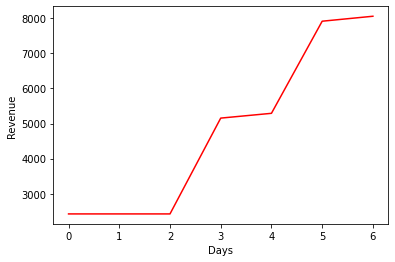

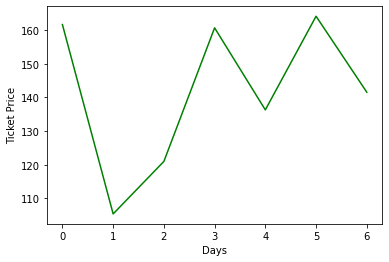

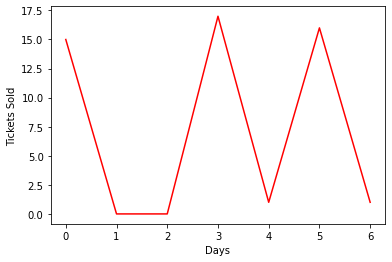

In [ ]:
revenue = []
price = []
ticket = []

print('pricing function:')
simulate_revenue(days_left=7, tickets_left=50, pricing_function=pricing_function_dp, verbose=True)
score_me(pricing_function_dp, 200)

plotgraph(revenue,price,ticket,7)
